In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # New library for interactive plots

# Set plotting styles
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-talk') # A nice, clean style for plots

# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Generate descriptive statistics
print("Descriptive Statistics:")
df.describe(include='all')

Descriptive Statistics:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


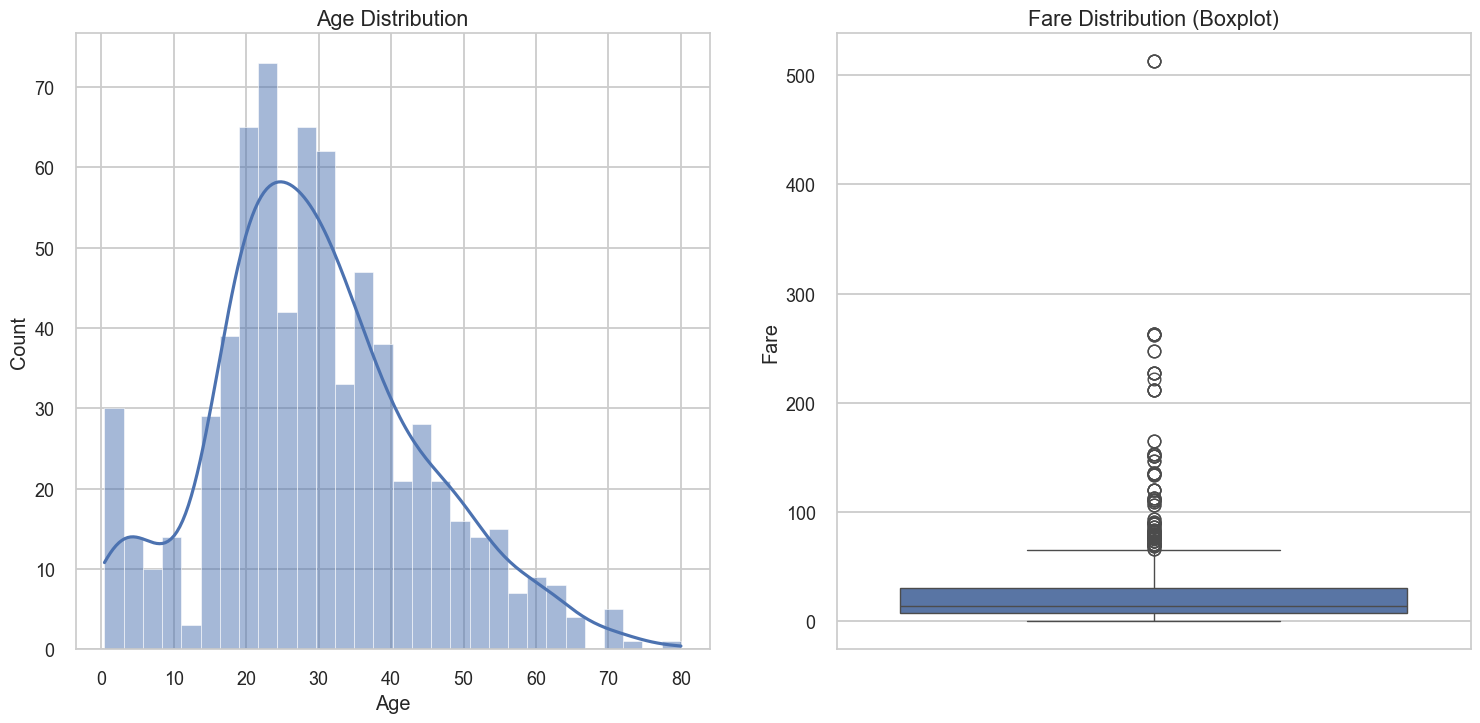

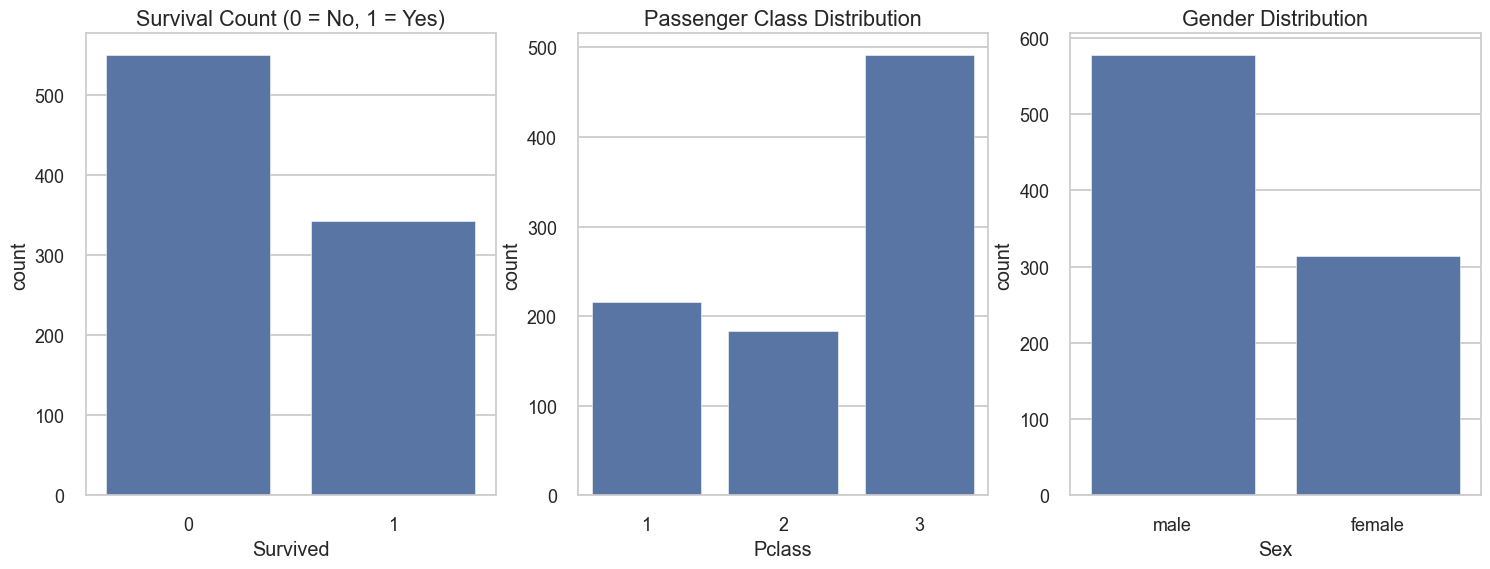

In [3]:
# --- Visualizing Numerical Features ---
plt.figure(figsize=(18, 8))

# Histogram for Age
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')

# Boxplot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Fare Distribution (Boxplot)')

plt.show()

# --- Visualizing Categorical Features ---
plt.figure(figsize=(18, 6))

# Count plot for Survived
plt.subplot(1, 3, 1)
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')

# Count plot for Pclass
plt.subplot(1, 3, 2)
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')

# Count plot for Sex
plt.subplot(1, 3, 3)
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')

plt.show()

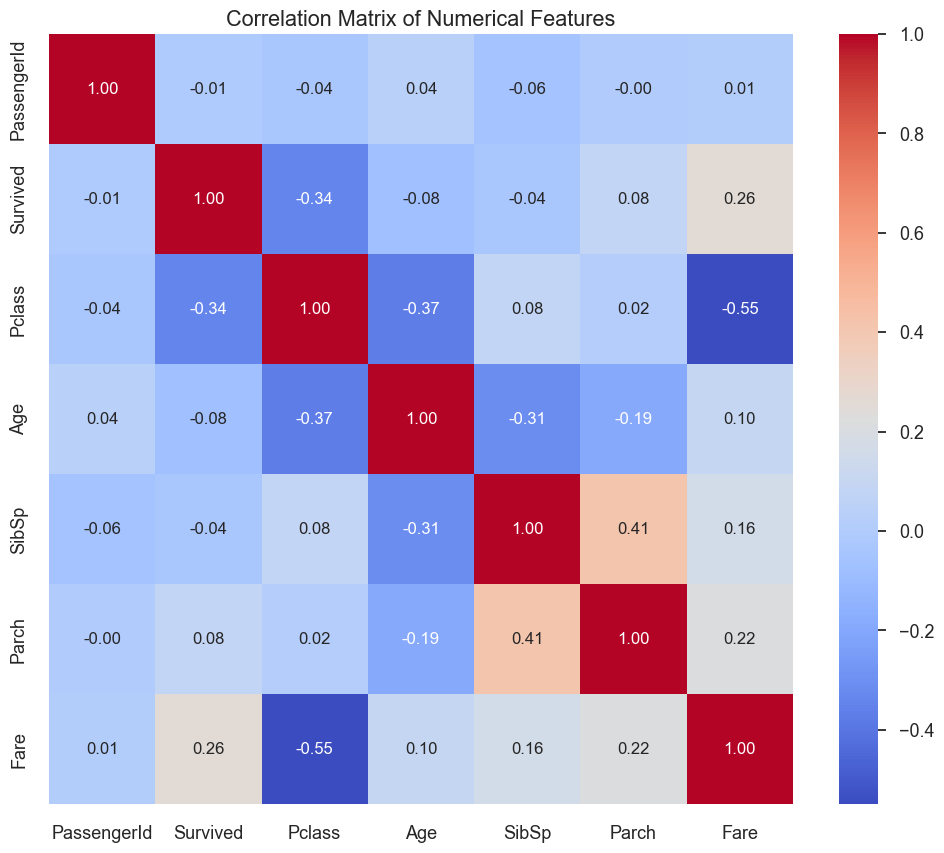

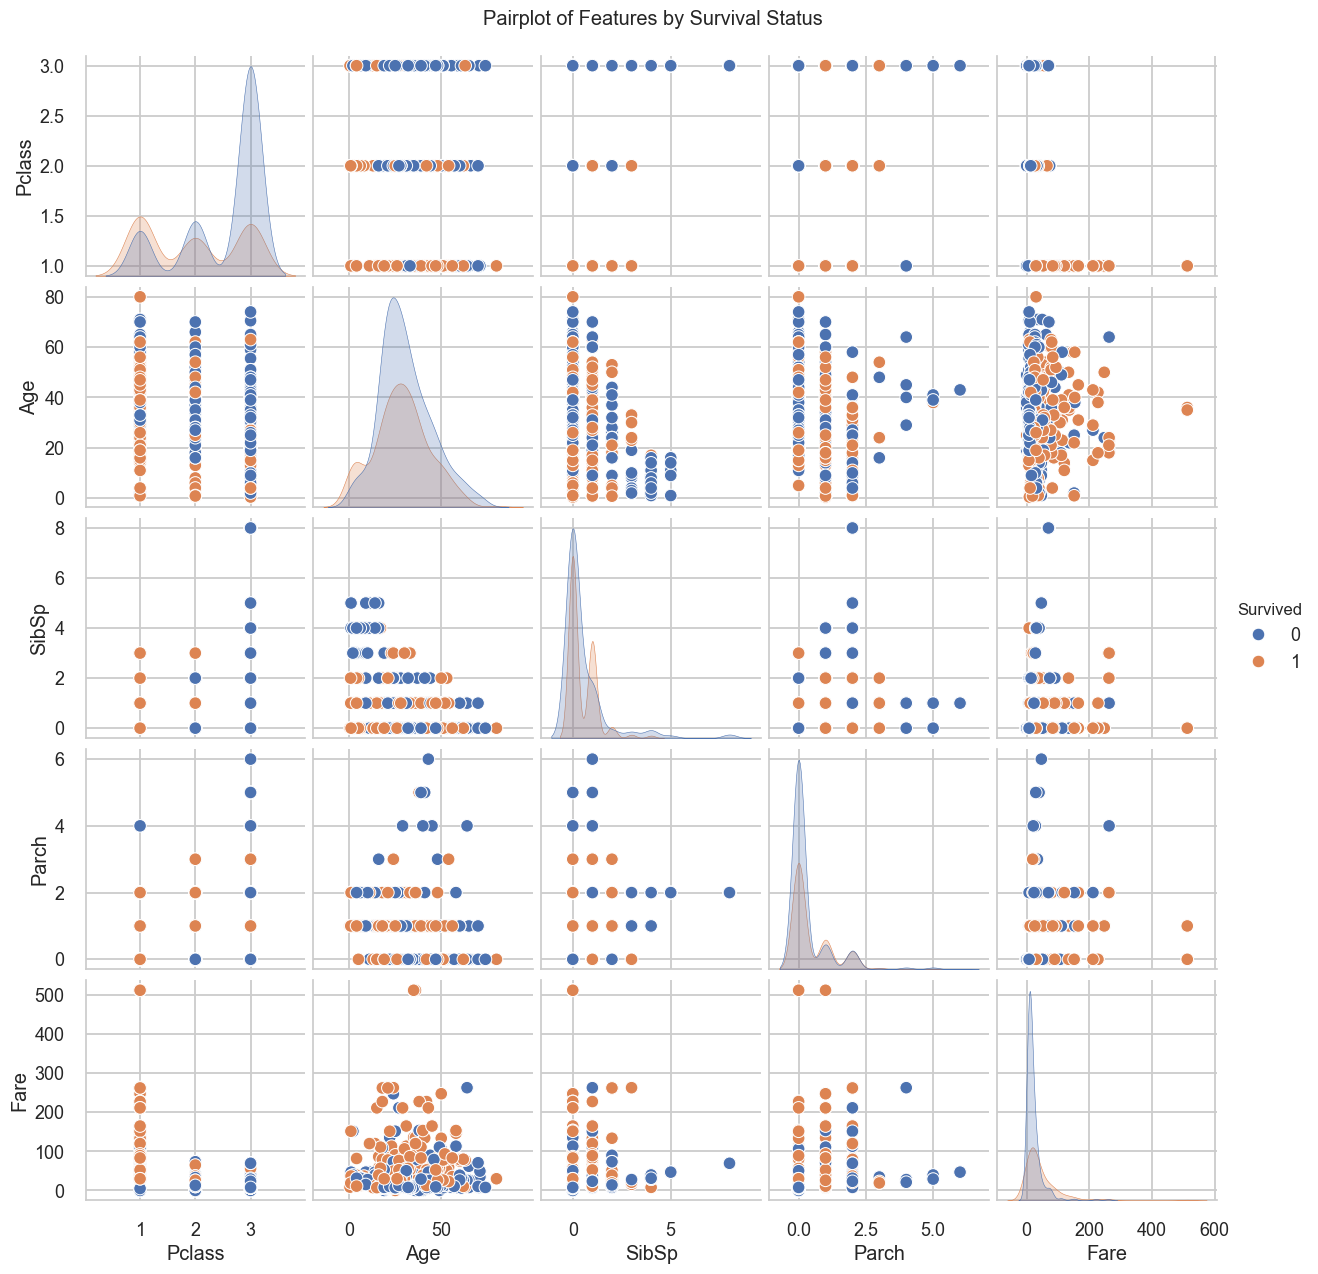

In [4]:
# --- Correlation Matrix for Numerical Features ---
# We select only the numerical columns for correlation
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# --- Pairplot to see relationships, colored by Survival status ---
# This can take a moment to run
sns.pairplot(df, hue='Survived', vars=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
plt.suptitle('Pairplot of Features by Survival Status', y=1.02)
plt.show()

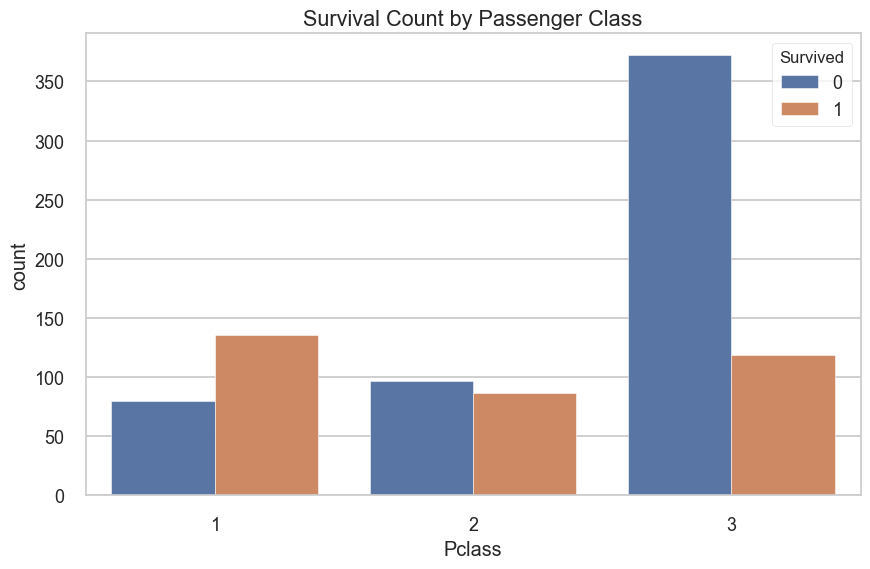

In [3]:
# --- How does Passenger Class affect Survival? ---
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

# --- Using Plotly for an interactive visualization ---
# How does Gender and Class together affect survival?
survival_by_sex_class = df.groupby(['Sex', 'Pclass'])['Survived'].mean().reset_index()

fig = px.bar(survival_by_sex_class, 
             x='Pclass', 
             y='Survived', 
             color='Sex',
             barmode='group',
             title='Survival Rate by Gender and Passenger Class',
             labels={'Survived': 'Survival Rate', 'Pclass': 'Passenger Class'})
fig.show()